In [1]:
import pandas as pd
import numpy as np
# Load local .csv file as DataFrame
df = pd.read_csv('duk_merge.csv')
# Inspect the data
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-05-24 14:30:00-04:00,112.519997,112.580002,112.519997,112.540001,112.540001,0
1,2022-05-24 14:31:00-04:00,112.529999,112.550003,112.489998,112.540001,112.540001,4641
2,2022-05-24 14:32:00-04:00,112.580002,112.629997,112.580002,112.629997,112.629997,2117
3,2022-05-24 14:33:00-04:00,112.660004,112.699997,112.639999,112.699997,112.699997,1875
4,2022-05-24 14:34:00-04:00,112.690002,112.709999,112.680000,112.705002,112.705002,3357


In [2]:
df['Date'] = df['Datetime'].str[:-6]
df['Date']=pd.to_datetime(df["Date"]).dt.strftime("%Y-%m-%d %H:%M:%S")

data_date = df.filter(['Date'])

data_date = data_date.values
# Get the number of rows to train the model on
training_data_date = int(np.ceil( len(data_date) * .95 ))

from sklearn.preprocessing import MinMaxScaler

#scaler1 = MinMaxScaler(feature_range=(0,1))
#scaled_data1 = scaler1.fit_transform(data_date)
# Create the training data set 
# Create the scaled training data set
train_data_date = data_date[0:int(training_data_date), :]

In [3]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))



In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.8928294 , 0.8928294 , 0.89795971, 0.90195009, 0.9022354 ,
       0.90537073, 0.90594047, 0.91050104, 0.91449142, 0.91107121,
       0.90822075, 0.90822075, 0.90708083, 0.90366063, 0.89910007,
       0.90081017, 0.89852989, 0.89624961, 0.89197435, 0.88952315,
       0.88541881, 0.88997894, 0.89151247, 0.89339958, 0.89339958,
       0.89217398, 0.89311427, 0.89510968, 0.89795971, 0.89567943,
       0.8945395 , 0.89852989, 0.89852989, 0.90708083, 0.90594047,
       0.90822075, 0.90822075, 0.90651065, 0.91449142, 0.9133515 ,
       0.9167717 , 0.91734188, 0.91563178, 0.91449142, 0.91676605,
       0.91449142, 0.91734188, 0.91962216, 0.9201919 , 0.92104739,
       0.91563178, 0.92190244, 0.92589282, 0.92475247, 0.92133226,
       0.92304236, 0.92304236, 0.92703275, 0.92475247, 0.92760293])]
[0.9287428488421146]

[array([0.8928294 , 0.8928294 , 0.89795971, 0.90195009, 0.9022354 ,
       0.90537073, 0.90594047, 0.91050104, 0.91449142, 0.91107121,
       0.90822075, 0.90822075, 0.907

Epoch 1/100
413/413 [==============================] - 22s 49ms/step - loss: 0.0076
Epoch 2/100
413/413 [==============================] - 76s 184ms/step - loss: 6.6434e-04
Epoch 3/100
413/413 [==============================] - 80s 193ms/step - loss: 5.7393e-04
Epoch 4/100
413/413 [==============================] - 92s 223ms/step - loss: 6.0292e-04
Epoch 5/100
413/413 [==============================] - 85s 206ms/step - loss: 4.1876e-04
Epoch 6/100
413/413 [==============================] - 90s 217ms/step - loss: 4.4128e-04
Epoch 7/100
413/413 [==============================] - 90s 219ms/step - loss: 3.5533e-04
Epoch 8/100
413/413 [==============================] - 87s 211ms/step - loss: 2.7237e-04
Epoch 9/100
413/413 [==============================] - 82s 198ms/step - loss: 3.2664e-04
Epoch 10/100
413/413 [==============================] - 38s 92ms/step - loss: 2.6387e-04
Epoch 11/100
413/413 [==============================] - 44s 107ms/step - loss: 1.8821e-04
Epoch 12/100
413/413 [===

413/413 [==============================] - 64s 156ms/step - loss: 7.8618e-05
Epoch 93/100
413/413 [==============================] - 69s 166ms/step - loss: 6.0711e-05
Epoch 94/100
413/413 [==============================] - 62s 150ms/step - loss: 6.5215e-05
Epoch 95/100
413/413 [==============================] - 80s 193ms/step - loss: 6.2244e-05
Epoch 96/100
413/413 [==============================] - 83s 202ms/step - loss: 7.7499e-05
Epoch 97/100
413/413 [==============================] - 94s 229ms/step - loss: 6.2466e-05
Epoch 98/100
413/413 [==============================] - 91s 220ms/step - loss: 5.7470e-05
Epoch 99/100
413/413 [==============================] - 84s 204ms/step - loss: 5.4880e-05
Epoch 100/100
413/413 [==============================] - 85s 205ms/step - loss: 5.9751e-05


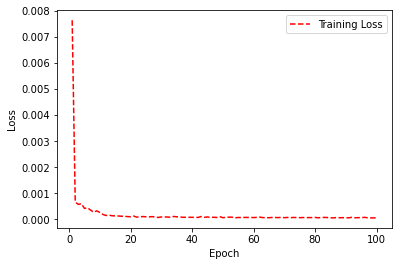

In [5]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from numpy import array
import matplotlib.pyplot as plt

# Build the LSTM model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape= (x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(128, return_sequences=True, activation='relu' ))
model.add(LSTM(64, return_sequences=True, activation='relu' ))
model.add(LSTM(32, return_sequences=True))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=16, epochs=100)

# Get training and test loss histories
training_loss = history.history['loss']
# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [9]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions3 = model.predict(x_test)
predictions3 = scaler.inverse_transform(predictions3)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions3 - y_test) ** 2)))
rmse

0.11479750857009237

In [10]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

train = data[:training_data_len]
valid_3 = data[training_data_len:]
valid_3['Predictions3'] = predictions3

mape(valid_3['Close'], valid_3['Predictions3'])

<ipython-input-10-cda6690b5d4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['Predictions3'] = predictions3


0.09096348115841195

In [11]:
valid_3['Predictions3']

6654    98.081886
6655    98.039108
6656    97.944092
6657    97.837860
6658    97.718559
          ...    
6999    99.237556
7000    99.249474
7001    99.254730
7002    99.269531
7003    99.261223
Name: Predictions3, Length: 350, dtype: float32